<a href="https://colab.research.google.com/github/umairchanna57/Deep_learning/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = keras.datasets.mnist

In [4]:
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


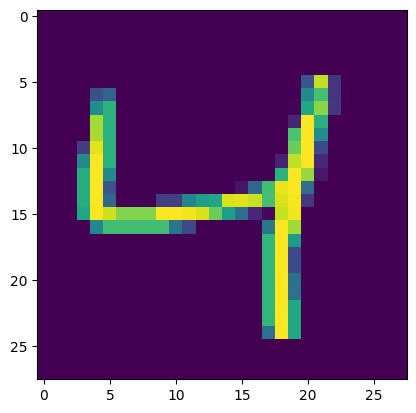

In [5]:
plt.imshow(x_train_full[2])

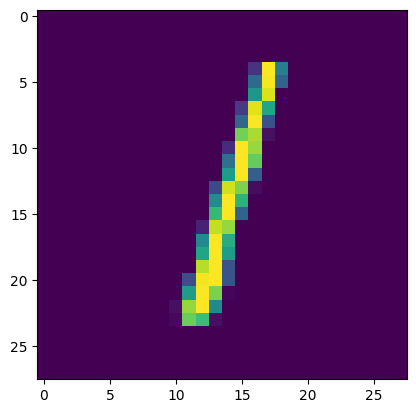

In [6]:
plt.imshow(x_test[2])

In [7]:
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.
x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test_norm

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model_history = model.fit(x_train,y_train,epochs=50,validation_data=(x_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 13s 4ms/step - loss: 0.6032 - accuracy: 0.8449 - val_loss: 0.2963 - val_accuracy: 0.9196
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2806 - accuracy: 0.9198 - val_loss: 0.2345 - val_accuracy: 0.9304
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2303 - accuracy: 0.9341 - val_loss: 0.1952 - val_accuracy: 0.9442
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1969 - accuracy: 0.9435 - val_loss: 0.1729 - val_accuracy: 0.9514
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1726 - accuracy: 0.9501 - val_loss: 0.1544 - val_accuracy: 0.9560
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1535 - accuracy: 0.9557 - val_loss: 0.1416 - val_accuracy: 0.9610
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1377 - accuracy: 0.9606 - val_loss: 0.1307 - val_accuracy

In [13]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0653 - accuracy: 0.9797


[0.06530704349279404, 0.9797000288963318]

In [14]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)

1/1 [==============================] - 0s 75ms/step


In [17]:
y_probability.round()

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)